In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 


In [43]:
df = pd.read_csv('HR_comma_sep.csv')
df.describe()

df.isnull().sum()
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [87]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730


In [53]:
df['salary'] = pd.factorize(df['salary'])[0]

<AxesSubplot:xlabel='salary'>

<Figure size 1000x800 with 0 Axes>

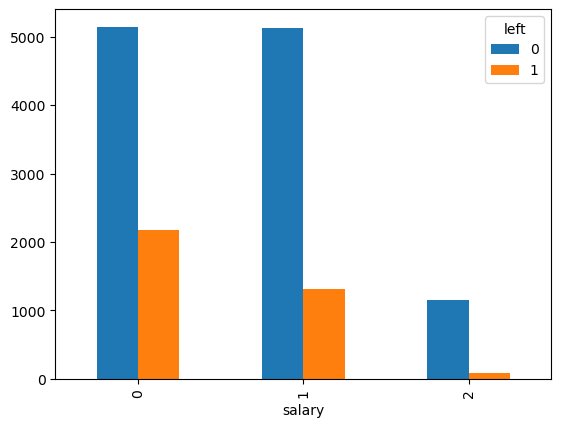

In [86]:
plt.figure(figsize=(10,8))
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:>

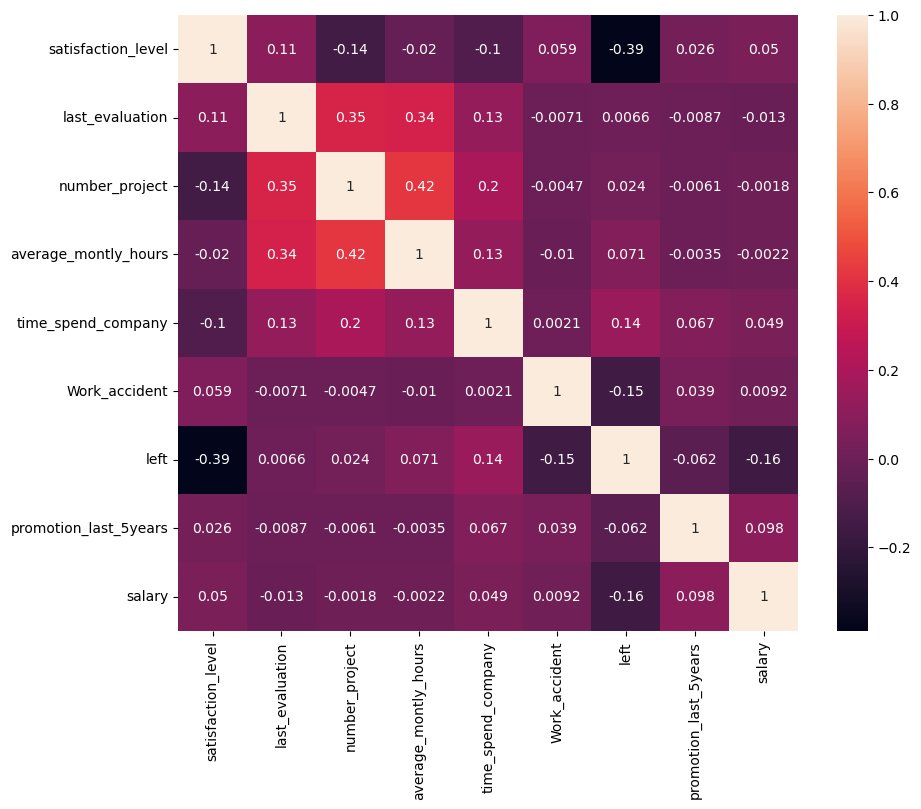

In [63]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)


<AxesSubplot:xlabel='Department'>

<Figure size 1000x800 with 0 Axes>

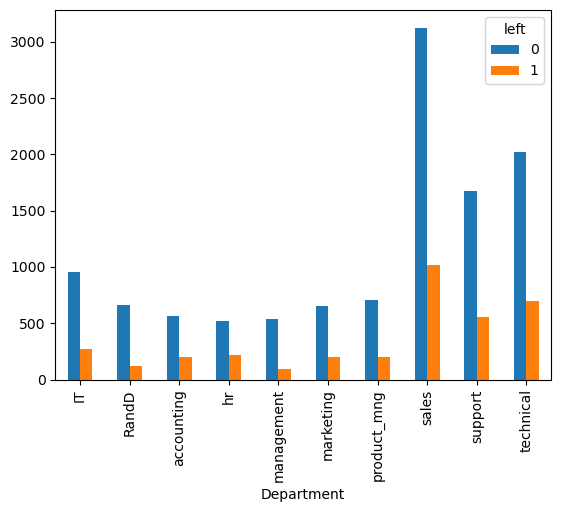

In [85]:
plt.figure(figsize=(10,8))
pd.crosstab(df.Department,df.left).plot(kind='bar')




In [62]:
print(df[(df['salary']==1) &(df['left']==1)]['Department'].value_counts())
print(df[df['salary']==0]['Department'].value_counts())

print(df[df['salary']==2]['Department'].value_counts())



sales          303
technical      294
support        158
hr             117
accounting     100
IT              97
product_mng     87
marketing       68
RandD           62
management      31
Name: Department, dtype: int64
sales          2099
technical      1372
support        1146
IT              609
product_mng     451
marketing       402
RandD           364
accounting      358
hr              335
management      180
Name: Department, dtype: int64
sales          269
management     225
technical      201
support        141
IT              83
marketing       80
accounting      74
product_mng     68
RandD           51
hr              45
Name: Department, dtype: int64


In [90]:
X=['satisfaction_level','salary','Work_accident']

features=df[X]

y=df['left']


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,y,train_size=0.30,random_state=1)
model = LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)
model.score(X_test,y_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,model.predict(X_test))


0.7960952380952381